# Análisis y Modelo Predictivo de Precios de Automóviles


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


C:\Users\alfonsolopez\AppData\Local\Temp\ipykernel_15632\1912317993.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette="viridis")
C:\Users\alfonsolopez\AppData\Local\Temp\ipykernel_15632\1912317993.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel', palette="viridis")


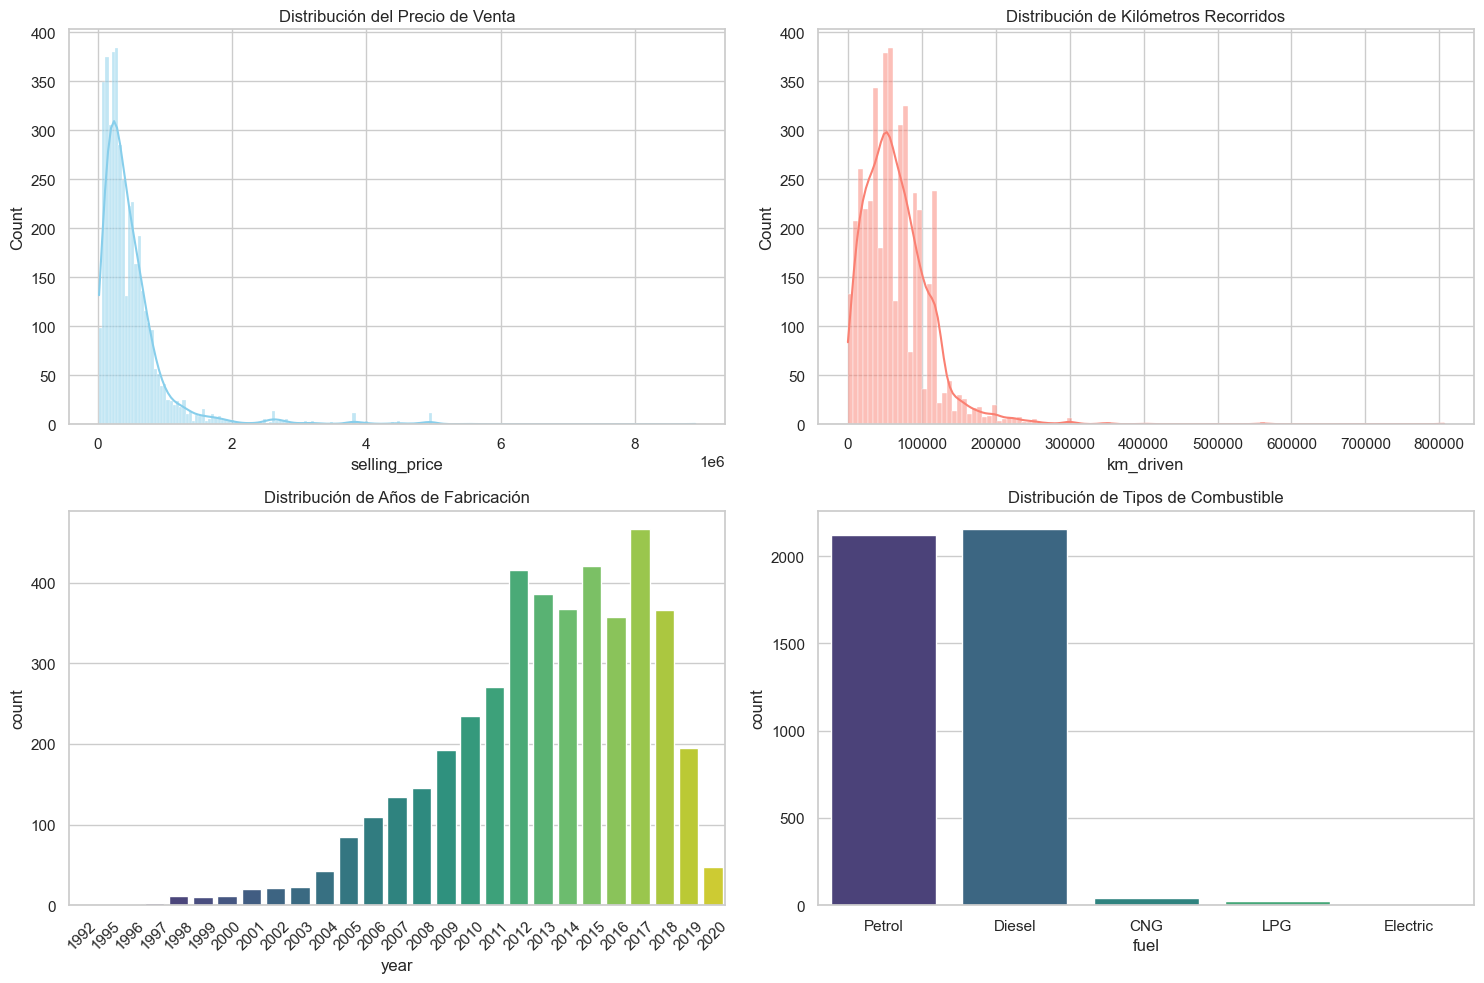

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title('Distribución del Precio de Venta')

plt.subplot(2, 2, 2)
sns.histplot(df['km_driven'], kde=True, color='salmon')
plt.title('Distribución de Kilómetros Recorridos')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='year', palette="viridis")
plt.xticks(rotation=45)
plt.title('Distribución de Años de Fabricación')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='fuel', palette="viridis")
plt.title('Distribución de Tipos de Combustible')

plt.tight_layout()
plt.show()


In [16]:
X = df.drop(columns=['selling_price', 'name'])
y = df['selling_price']
num_cols = ['year', 'km_driven']
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 391960.2652597365
R2 Score: 0.49656681352025356


C:\Users\alfonsolopez\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separar características y variable objetivo
X = df.drop(columns=['selling_price', 'name'])
y = df['selling_price']

# Convertir la variable 'selling_price' a una clasificación binaria para Regresión Logística
y_class = (y > y.median()).astype(int)  # 1 si el precio es alto, 0 si es bajo

# Definir columnas numéricas y categóricas
num_cols = ['year', 'km_driven']
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Configurar el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Crear pipeline de Regresión Lineal
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

# Entrenar el modelo
linear_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_linear = linear_model.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Regresión Lineal - RMSE:", rmse_linear)
print("Regresión Lineal - R2 Score:", r2_linear)


Regresión Lineal - RMSE: 426786.6899872592
Regresión Lineal - R2 Score: 0.4031303601432119


C:\Users\alfonsolopez\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear pipeline de Regresión Logística
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(random_state=42))])

# Entrenar el modelo
logistic_model.fit(X_train_class, y_train_class)

# Evaluar el modelo
y_pred_logistic = logistic_model.predict(X_test_class)

# Métricas de clasificación
accuracy = accuracy_score(y_test_class, y_pred_logistic)
precision = precision_score(y_test_class, y_pred_logistic)
recall = recall_score(y_test_class, y_pred_logistic)
f1 = f1_score(y_test_class, y_pred_logistic)

print("Regresión Logística - Accuracy:", accuracy)
print("Regresión Logística - Precision:", precision)
print("Regresión Logística - Recall:", recall)
print("Regresión Logística - F1 Score:", f1)


Regresión Logística - Accuracy: 0.8191244239631337
Regresión Logística - Precision: 0.8183908045977012
Regresión Logística - Recall: 0.8202764976958525
Regresión Logística - F1 Score: 0.8193325661680092


In [30]:
from sklearn.tree import DecisionTreeRegressor

# Crear pipeline de Árbol de Decisión para Regresión
tree_regressor = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', DecisionTreeRegressor(random_state=42))])

# Entrenar el modelo
tree_regressor.fit(X_train, y_train)

# Evaluar el modelo
y_pred_tree_reg = tree_regressor.predict(X_test)
rmse_tree_reg = mean_squared_error(y_test, y_pred_tree_reg, squared=False)
r2_tree_reg = r2_score(y_test, y_pred_tree_reg)

print("Árbol de Decisión (Regresión) - RMSE:", rmse_tree_reg)
print("Árbol de Decisión (Regresión) - R2 Score:", r2_tree_reg)



Árbol de Decisión (Regresión) - RMSE: 441160.89047597186
Árbol de Decisión (Regresión) - R2 Score: 0.36224809504675115


C:\Users\alfonsolopez\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


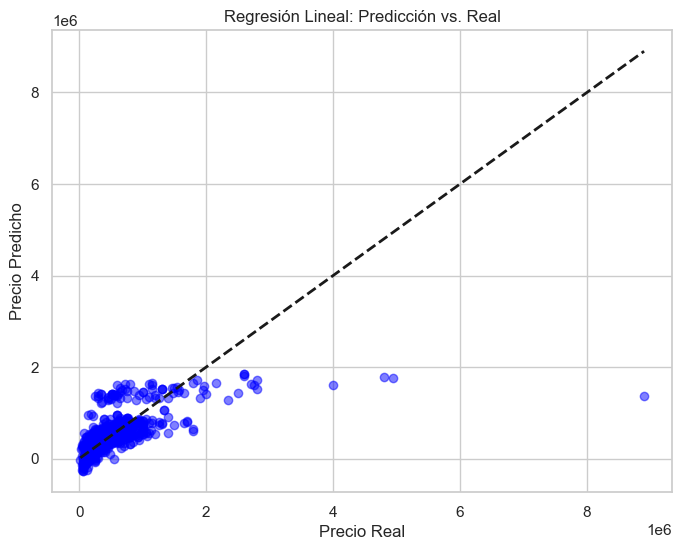

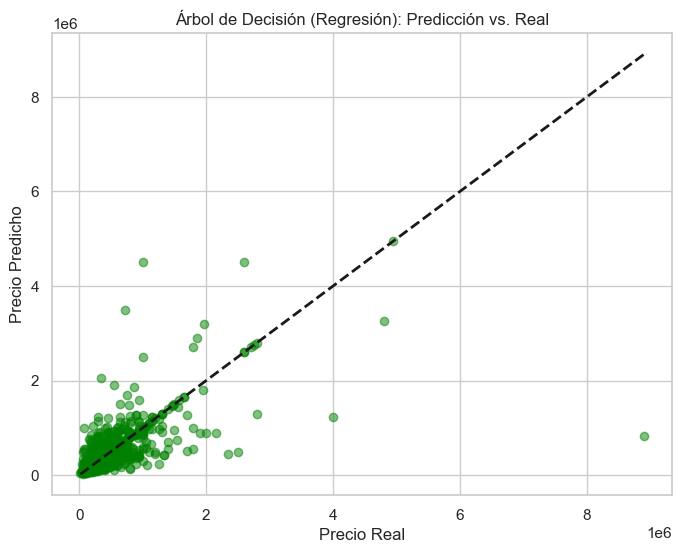

In [32]:
import matplotlib.pyplot as plt

# Gráfica para Regresión Lineal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal: Predicción vs. Real")
plt.show()

# Gráfica para Árbol de Decisión (Regresión)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree_reg, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Árbol de Decisión (Regresión): Predicción vs. Real")
plt.show()


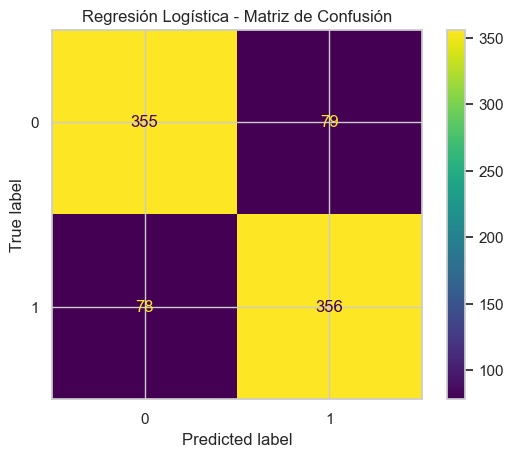

NameError: name 'tree_classifier' is not defined

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión para Regresión Logística
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_class, y_test_class)
plt.title("Regresión Logística - Matriz de Confusión")
plt.show()

# Matriz de confusión para Árbol de Decisión (Clasificación)
ConfusionMatrixDisplay.from_estimator(tree_classifier, X_test_class, y_test_class)
plt.title("Árbol de Decisión (Clasificación) - Matriz de Confusión")
plt.show()



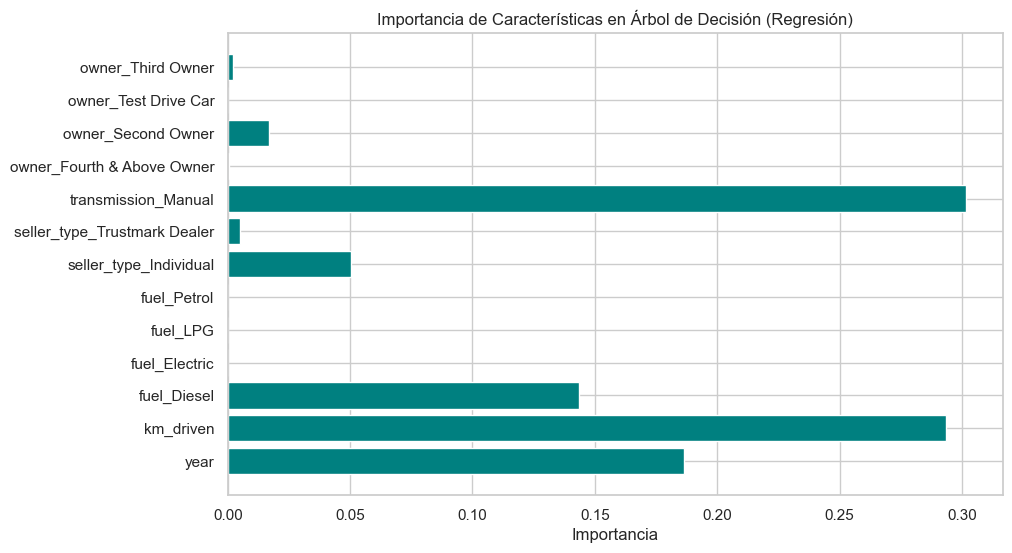

In [36]:
# Importancia de las características para el Árbol de Decisión en Regresión
importances = tree_regressor.named_steps['regressor'].feature_importances_
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(cat_cols)
feature_names = num_cols + list(feature_names)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="teal")
plt.xlabel("Importancia")
plt.title("Importancia de Características en Árbol de Decisión (Regresión)")
plt.show()
